In [4]:
import yfinance as yf
import datetime
import numpy as np
import matplotlib.pyplot as plt
import hvplot.pandas
import pandas as pd
import quantstats as qs
import talib as ta

In [5]:
df = yf.download("BTC-USD")

[*********************100%***********************]  1 of 1 completed


In [6]:
df.tail(15)

Open          High           Low         Close  \
Date                                                                 
2022-05-24  29101.125000  29774.355469  28786.589844  29655.585938   
2022-05-25  29653.134766  30157.785156  29384.949219  29562.361328   
2022-05-26  29564.777344  29834.160156  28261.906250  29267.224609   
2022-05-27  29251.140625  29346.943359  28326.613281  28627.574219   
2022-05-28  28622.625000  28814.900391  28554.566406  28814.900391   
2022-05-29  29019.867188  29498.009766  28841.107422  29445.957031   
2022-05-30  29443.365234  31949.630859  29303.572266  31726.390625   
2022-05-31  31723.865234  32249.863281  31286.154297  31792.310547   
2022-06-01  31792.554688  31957.285156  29501.587891  29799.080078   
2022-06-02  29794.890625  30604.734375  29652.705078  30467.488281   
2022-06-03  30467.806641  30633.035156  29375.689453  29704.390625   
2022-06-04  29706.138672  29930.564453  29500.005859  29832.914062   
2022-06-05  29835.117188  30117.744141  29574.449219  29906.662109   
2022-06-06  29910.283203  31693.291016  29894.187500  31370.671875   
2022-06-07  31313.416016  31313.416016  29311.683594  29513.609375   

               Adj Close       Volume  
Date                                   
2022-05-24  29655.585938  26616506245  
2022-05-25  29562.361328  27525063551  
2022-05-26  29267.224609  36774325352  
2022-05-27  28627.574219  36582005748  
2022-05-28  28814.900391  35519577634  
2022-05-29  29445.957031  18093886409  
2022-05-30  31726.390625  39277993274  
2022-05-31  31792.310547  33538210634  
2022-06-01  29799.080078  41135817341  
2022-06-02  30467.488281  29083562061  
2022-06-03  29704.390625  26175547452  
2022-06-04  29832.914062  16588370958  
2022-06-05  29906.662109  17264085441  
2022-06-06  31370.671875  31947336829  
2022-06-07  29513.609375  35564826624

In [7]:
# Count nulls
df.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [8]:
# Calculate VWAP
df["VWAP"] = (df.Volume*(df.Close)).cumsum() / df.Volume.cumsum()

In [9]:
df.head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2014-09-17  465.864014  468.174011  452.421997  457.334015  457.334015   
2014-09-18  456.859985  456.859985  413.104004  424.440002  424.440002   
2014-09-19  424.102997  427.834991  384.532013  394.795990  394.795990   
2014-09-20  394.673004  423.295990  389.882996  408.903992  408.903992   
2014-09-21  408.084991  412.425995  393.181000  398.821014  398.821014   

              Volume        VWAP  
Date                              
2014-09-17  21056800  457.334015  
2014-09-18  34483200  436.911062  
2014-09-19  37919700  419.823580  
2014-09-20  36863600  416.734836  
2014-09-21  26580100  413.700159

In [10]:
# Drop coulmns
df.drop(columns=["Adj Close", "Volume"])

Open          High           Low         Close  \
Date                                                                 
2014-09-17    465.864014    468.174011    452.421997    457.334015   
2014-09-18    456.859985    456.859985    413.104004    424.440002   
2014-09-19    424.102997    427.834991    384.532013    394.795990   
2014-09-20    394.673004    423.295990    389.882996    408.903992   
2014-09-21    408.084991    412.425995    393.181000    398.821014   
...                  ...           ...           ...           ...   
2022-06-03  30467.806641  30633.035156  29375.689453  29704.390625   
2022-06-04  29706.138672  29930.564453  29500.005859  29832.914062   
2022-06-05  29835.117188  30117.744141  29574.449219  29906.662109   
2022-06-06  29910.283203  31693.291016  29894.187500  31370.671875   
2022-06-07  31313.416016  31313.416016  29311.683594  29513.609375   

                    VWAP  
Date                      
2014-09-17    457.334015  
2014-09-18    436.911062  
2014-09-19    419.823580  
2014-09-20    416.734836  
2014-09-21    413.700159  
...                  ...  
2022-06-03  28015.684187  
2022-06-04  28016.385079  
2022-06-05  28017.143538  
2022-06-06  28019.631692  
2022-06-07  28020.864646  

[2821 rows x 5 columns]

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2821 entries, 2014-09-17 to 2022-06-07
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2821 non-null   float64
 1   High       2821 non-null   float64
 2   Low        2821 non-null   float64
 3   Close      2821 non-null   float64
 4   Adj Close  2821 non-null   float64
 5   Volume     2821 non-null   int64  
 6   VWAP       2821 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 176.3 KB


In [12]:
# Convert to datetime index
df.index = pd.to_datetime(df.index)

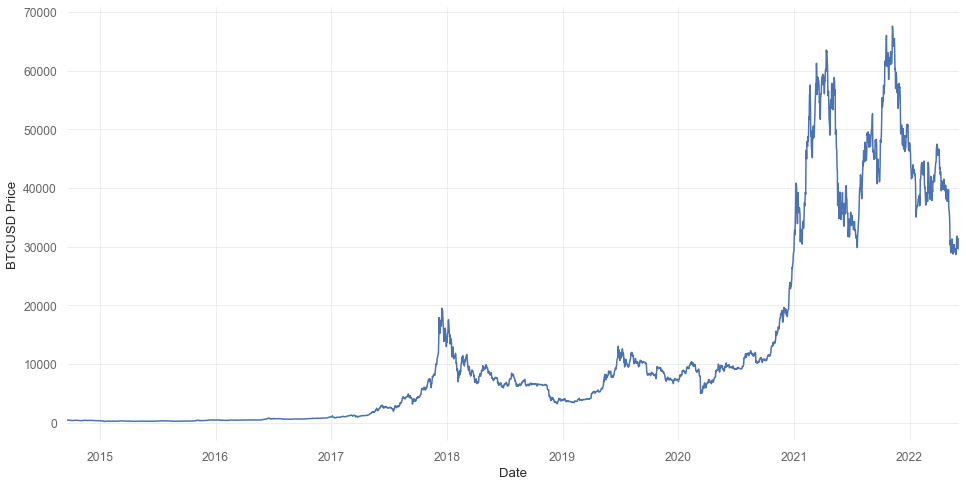

In [13]:
df.Close.plot(figsize=(16, 8))
plt.ylabel("BTCUSD Price")
plt.show()

<!-- # Ichimoku Cloud
The ichimoku cloud is a technical indicator that consists of five plots and a cloud. It can assist in displaying support, esistance, momentum, and trend in a single view. 
We adjusted the parameters for cryptocurrency pairs to 20, 60, 120, 30 because the crypto market is open 24/7 and more volatile than other assets.-->

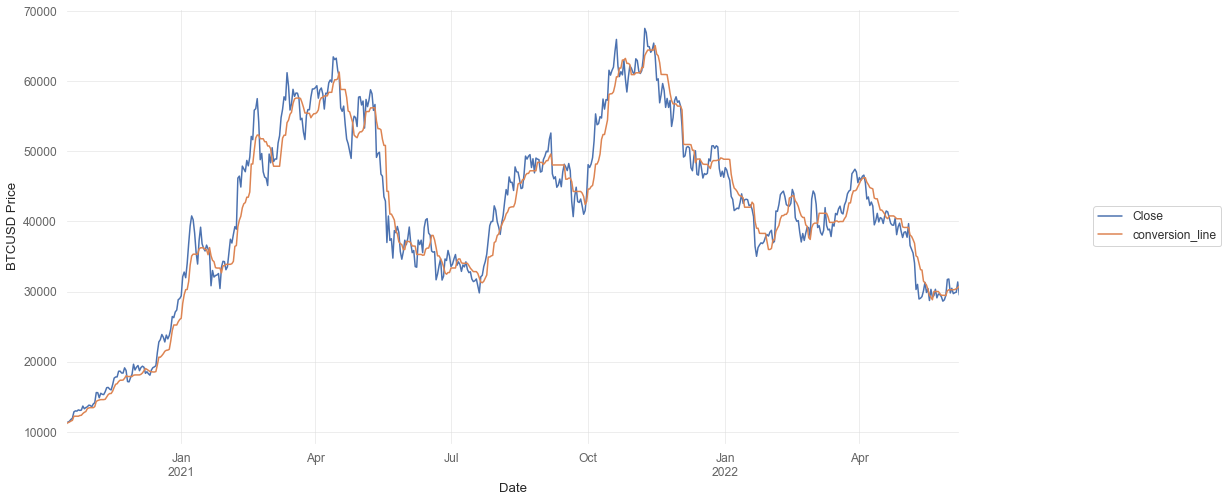

In [14]:
# Tenkansen (Conversion Line)
high_9 = df.High.rolling(9).max()
low_9 = df.Low.rolling(9).min()
df["conversion_line"] = (high_9 + low_9) / 2
conversion_line = df[["Close", "conversion_line"]]
conversion_line[-600:].plot(figsize=(16, 8))
plt.legend(loc="center right", bbox_to_anchor=(1.3, 0.5))
plt.ylabel("BTCUSD Price")
plt.show()

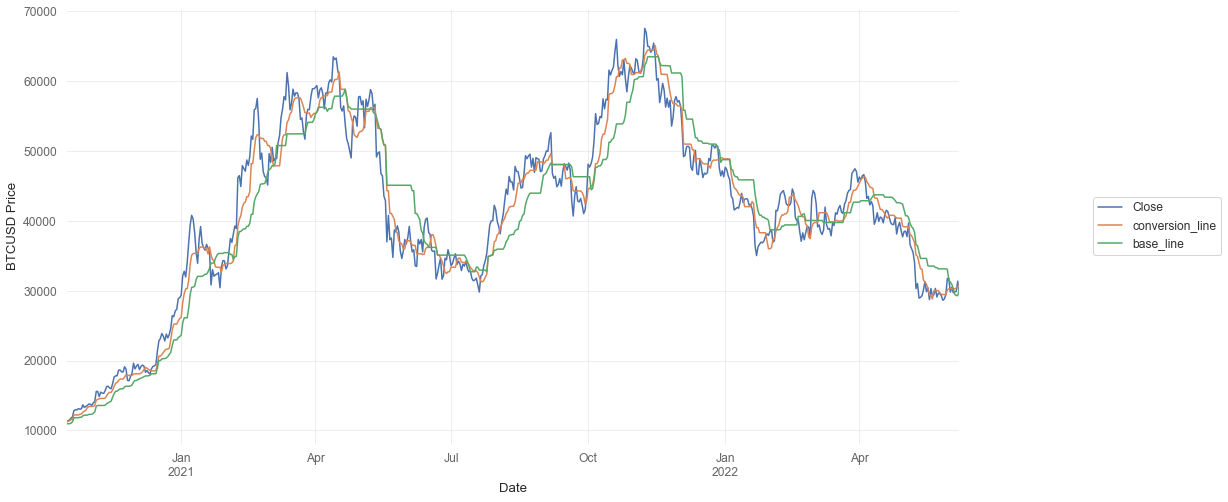

In [15]:
# Kijun-sen (Base Line)
high_26 = df.High.rolling(26).max()
low_26 = df.Low.rolling(26).min()
df["base_line"] = (high_26 + low_26) / 2

base_line = df[["Close", "conversion_line", "base_line"]]
base_line[-600:].plot(figsize=(16, 8))
plt.legend(loc="center right", bbox_to_anchor=(1.3, 0.5))
plt.ylabel("BTCUSD Price")
plt.show()

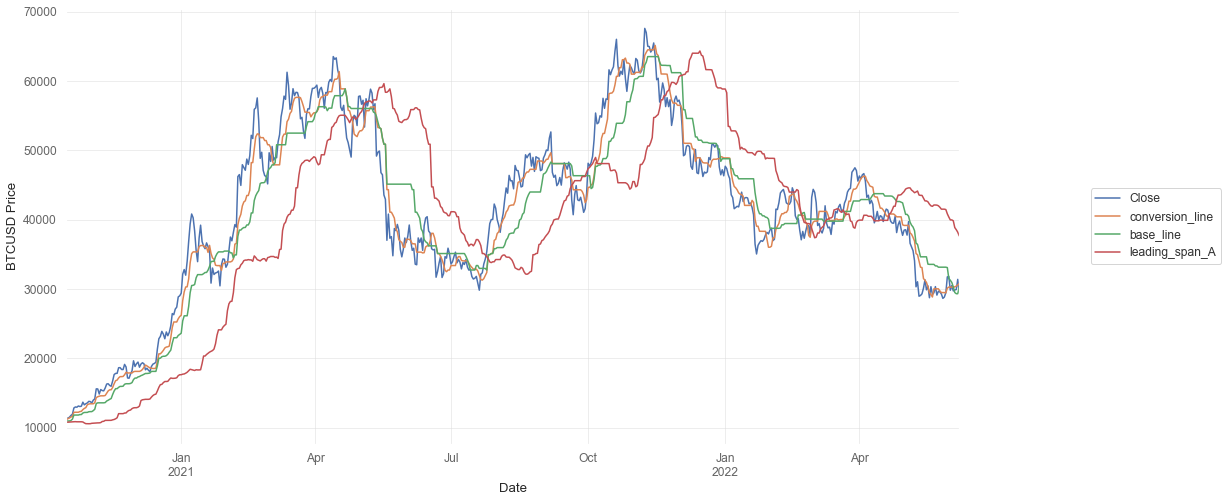

In [16]:
# Senkou Span A (Leading Span A)
df["leading_span_A"] = ((df.conversion_line + df.base_line) / 2).shift(30)

leading_span_A = df[["Close", "conversion_line",
                     "base_line", "leading_span_A"]]

leading_span_A[-600:].plot(figsize=(16, 8))
plt.legend(loc="center right", bbox_to_anchor=(1.3, 0.5))
plt.ylabel("BTCUSD Price")
plt.show()

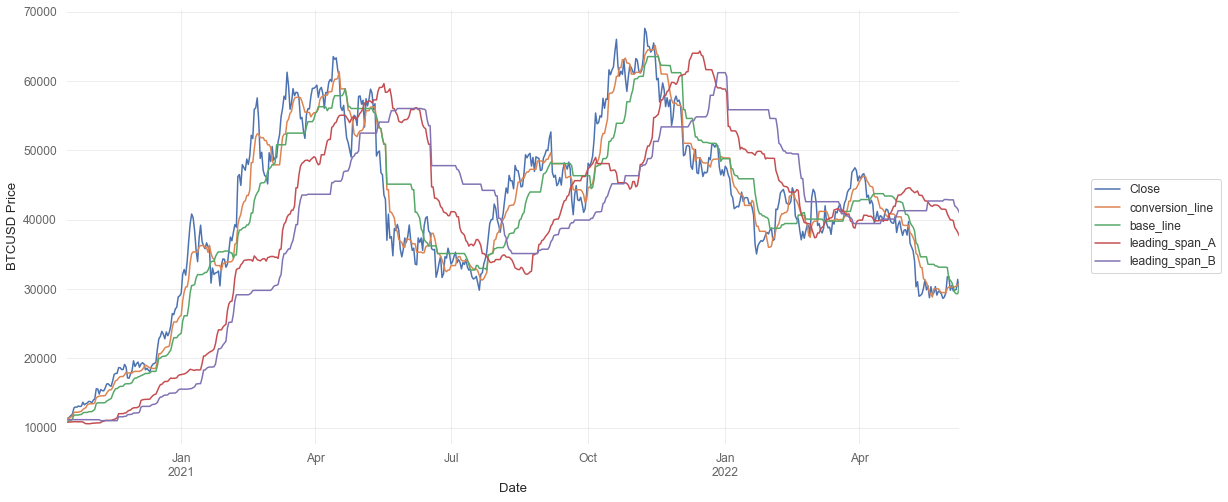

In [17]:
# Senkou Span B (Leading Span B)
high_52 = df.High.rolling(52).max()
low_52 = df.Low.rolling(52).min()
df["leading_span_B"] = ((high_52 + low_52) / 2).shift(30)

leading_span_B = df[["Close", "conversion_line",
                     "base_line", "leading_span_A", "leading_span_B"]]
leading_span_B[-600:].plot(figsize=(16, 8))
plt.legend(loc="center right", bbox_to_anchor=(1.3, 0.5))
plt.ylabel("BTCUSD Price")
plt.show()

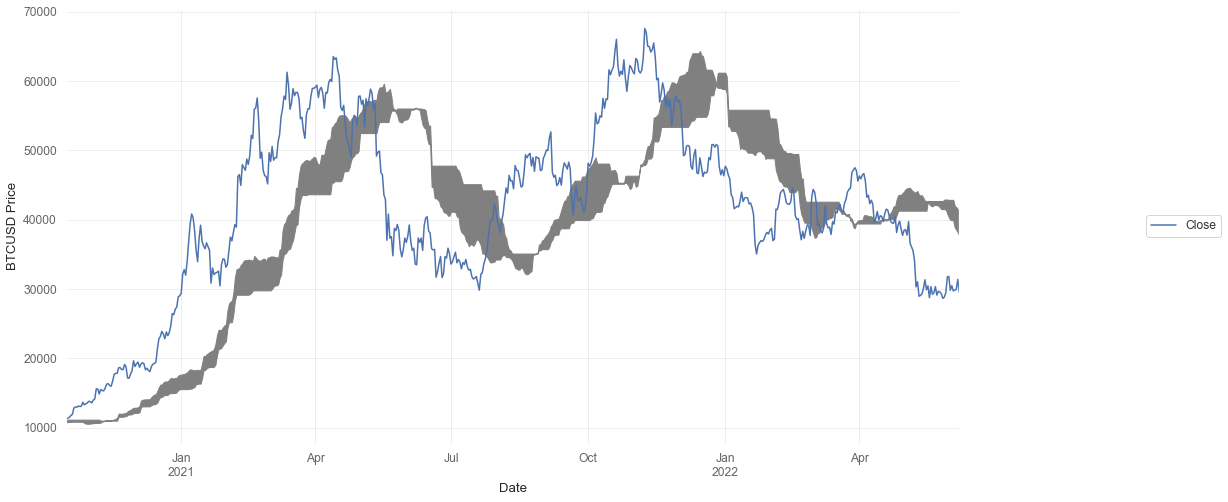

In [18]:
# Ichimoku Cloud
cloud = df[-600:].Close.plot(figsize=(16, 8))
cloud.fill_between(
    df[-600:].index, df[-600:].leading_span_A, df[-600:].leading_span_B, color="grey")
plt.legend(loc="center right", bbox_to_anchor=(1.3, 0.5))
plt.ylabel("BTCUSD Price")
plt.show()

In [19]:
# RSI indicator settings
df['RSI'] = ta.RSI(df.Close,14)

In [20]:
# Entry setup
df["signal"] = np.nan

# Prices are above the cloud
condition_1 = (df.Close > df.leading_span_A) & (df.Close > df.leading_span_B)

# leading Span A (senkou_span_A) is greater than leading span B (senkou_span_B)
condition_2 = (df.leading_span_A > df.leading_span_B)

# # Conversion Line (tenkan_sen) moves above Base Line (kijun_sen)
condition_3 = (df.conversion_line > df.base_line)

# RSI momentum
condition_4 = (df.RSI > 50) 

# Combine the conditions and store in the signal column 1 when all the conditions are true
df.loc[condition_1 & condition_2 & condition_3 & condition_4, "signal"] = 1

In [21]:
# Exit (to cash)
# Price closes below the cloud 
condition_1 = (df.Close < df.leading_span_A) 

# Store condition in signal column 0 when true
df.loc[(condition_1), "signal"] = 0

# If signal NA foward fill with previous signal
df.signal.fillna(method="ffill", inplace=True)

df.iloc[320:360, :]

Open        High         Low       Close   Adj Close  \
Date                                                                     
2015-08-03  282.806000  285.471008  280.233002  281.226990  281.226990   
2015-08-04  281.225006  285.714996  281.225006  285.217987  285.217987   
2015-08-05  284.846985  285.501007  281.488007  281.881989  281.881989   
2015-08-06  281.906006  281.906006  278.403015  278.576996  278.576996   
2015-08-07  278.740997  280.391998  276.365997  279.584991  279.584991   
2015-08-08  279.742004  279.928009  260.709991  260.997009  260.997009   
2015-08-09  261.115997  267.002991  260.467987  265.083008  265.083008   
2015-08-10  265.477997  267.032013  262.596008  264.470001  264.470001   
2015-08-11  264.342010  270.385986  264.093994  270.385986  270.385986   
2015-08-12  270.597992  270.673004  265.468994  266.376007  266.376007   
2015-08-13  266.183014  266.231995  262.841003  264.079987  264.079987   
2015-08-14  264.131989  267.466003  261.477997  265.679993  265.679993   
2015-08-15  265.528992  266.666992  261.295990  261.550995  261.550995   
2015-08-16  261.865997  262.440002  257.040985  258.506989  258.506989   
2015-08-17  258.489990  260.505005  257.117004  257.976013  257.976013   
2015-08-18  257.925995  257.993011  211.078995  211.078995  211.078995   
2015-08-19  225.671005  237.408997  222.766006  226.684006  226.684006   
2015-08-20  226.899002  237.365005  226.899002  235.350006  235.350006   
2015-08-21  235.354996  236.432007  231.723999  232.569000  232.569000   
2015-08-22  232.662003  234.957001  222.703995  230.389999  230.389999   
2015-08-23  230.376007  232.705002  225.580002  228.169006  228.169006   
2015-08-24  228.112000  228.139008  210.442993  210.494995  210.494995   
2015-08-25  210.067993  226.320999  199.567001  221.608994  221.608994   
2015-08-26  222.076004  231.182999  220.203995  225.830994  225.830994   
2015-08-27  226.050003  228.643005  223.684006  224.768997  224.768997   
2015-08-28  224.701004  235.218994  220.925995  231.395996  231.395996   
2015-08-29  231.548996  233.222000  227.330002  229.779999  229.779999   
2015-08-30  229.895004  232.067993  226.246994  228.761002  228.761002   
2015-08-31  229.113998  231.955994  225.914993  230.056000  230.056000   
2015-09-01  230.255997  231.216003  226.860001  228.121002  228.121002   
2015-09-02  228.026993  230.576996  226.475006  229.283997  229.283997   
2015-09-03  229.324005  229.604996  226.667007  227.182999  227.182999   
2015-09-04  227.214996  230.899994  227.050995  230.298004  230.298004   
2015-09-05  230.199005  236.143005  229.442993  235.018997  235.018997   
2015-09-06  234.869995  242.912003  234.681000  239.839996  239.839996   
2015-09-07  239.934006  242.106003  238.722000  239.847000  239.847000   
2015-09-08  239.845993  245.781006  239.677994  243.606995  243.606995   
2015-09-09  243.414993  244.416000  237.820999  238.167999  238.167999   
2015-09-10  238.335999  241.292999  235.791000  238.477005  238.477005   
2015-09-11  238.328995  241.169006  238.328995  240.106995  240.106995   

              Volume        VWAP  conversion_line   base_line  leading_span_A  \
Date                                                                            
2015-08-03  21474100  286.633870       287.651489  290.740005      251.304001   
2015-08-04  21908700  286.630108       287.651489  291.598007      255.034756   
2015-08-05  20128000  286.618547       287.088989  293.218506      257.761250   
2015-08-06  18792100  286.600308       286.032501  293.218506      258.158749   
2015-08-07  42484800  286.564519       283.246002  291.495499      259.389751   
2015-08-08  58533000  286.386068       274.834503  279.241989      260.088249   
2015-08-09  23789600  286.325808       273.091492  279.120987      269.027252   
2015-08-10  20979400  286.271423       273.091492  279.120987      271.659756   
2015-08-11  25433900  286.223646       273.091492  279.120987      280.838257   
2015-08-12  268154

In [22]:
df["signal_change"] = df.signal.diff()
df["signal_change"].value_counts()

 0.0    2706
 1.0      25
-1.0      25
Name: signal_change, dtype: int64

In [30]:
# Visualize entry position relative to close price
entry = df[df["signal_change"] == 1.0]["Close"].hvplot.scatter(
    color="green",
    marker="^",
    size=200,
    legend=False,
    ylabel="Price in $",
    width=1000,
    height=400
)

# Visualize exit position relative to close price
exit = df[df["signal_change"] == -1.0]["Close"].hvplot.scatter(
    color="red",
    marker="v",
    size=200,
    legend=False,
    ylabel="Price in $",
    width=1000,
    height=400
)


# Visualize close price for the investment
security_close = df[["Close"]].hvplot(
    line_color="lightgray",
    ylabel="Price in $",
    width=1000,
    height=400
)

# Plot Ichimoku indicators
ichi = df[["Close", "conversion_line",
                     "base_line", "leading_span_A", "leading_span_B"]].hvplot(
    ylabel="Price in $",
    width=1000,
    height=400
)


# # Overlay plots
ichiplot = security_close * ichi * entry * exit
%store ichiplot

Stored 'ichiplot' (Overlay)


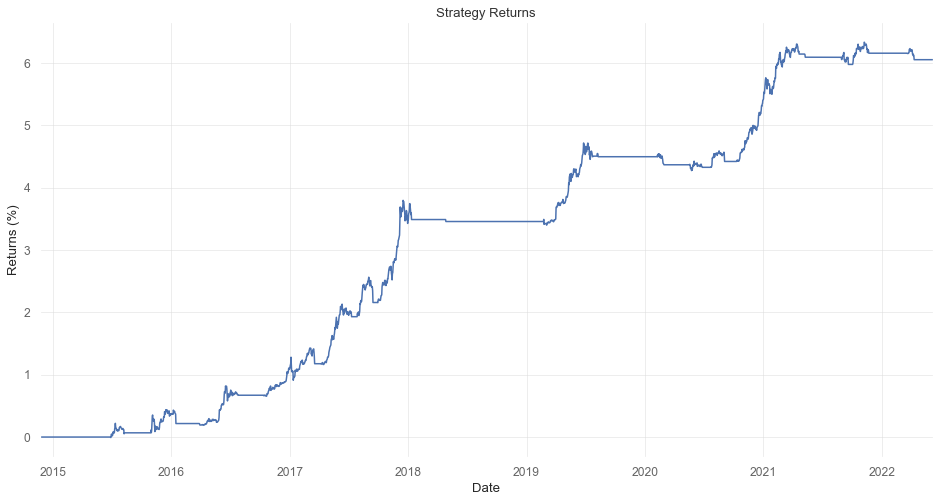

In [28]:
# Calculate daily returns
daily_returns = df.Close.pct_change()

# Calculate strategy returns 
strategy_returns = daily_returns * df.signal.shift(1)
strategy_returns.dropna(inplace=True)

# Plot strategy returns
strategy_returns.cumsum().plot(figsize=(16, 8))
plt.xlabel("Date")
plt.ylabel("Returns (%)")
plt.title("Strategy Returns")
plt.show()

In [25]:
# Check Sharpe ratio calculation 
def annualized_sharpe_ratio(returns, N=252):
    return ((N) * returns.mean()) / (returns.std() * np.sqrt(N))

# Sharpe ratio  
excess_daily_strategy_return = strategy_returns 
sharpe = annualized_sharpe_ratio(excess_daily_strategy_return)
print("The Sharpe ratio of strategy is %.2f" % sharpe)

The Sharpe ratio of strategy is 1.34


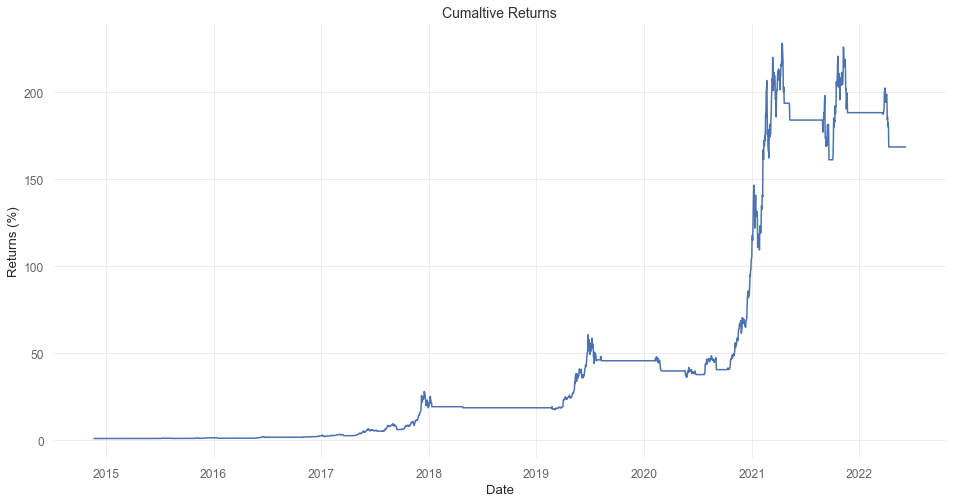

In [29]:
# Calculate the cumulative returns
df["cumulative_returns"] = (strategy_returns+1).cumprod()

# Plot the cumulative returns
plt.figure(figsize=(16, 8))
plt.plot(df["cumulative_returns"])
plt.title("Cumaltive Returns", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Returns (%)")
plt.show()

In [24]:
# strategy_returns.value_counts()

Maximum drawdown of the strategy is -40.32%


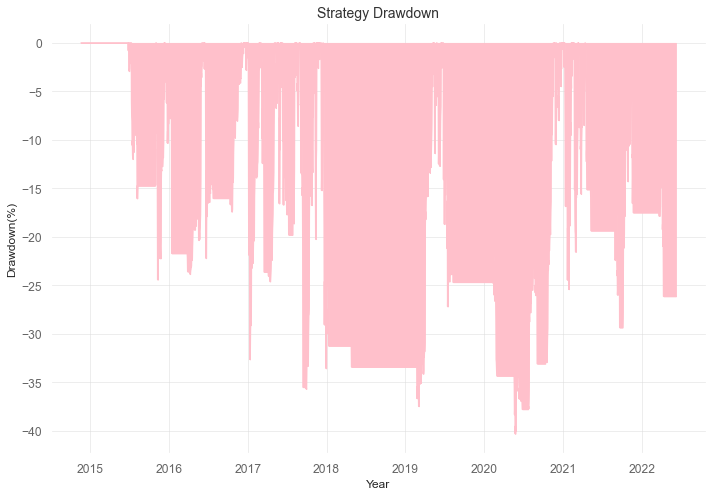

In [25]:
# Calculate the running maximum
running_max = np.maximum.accumulate(df["cumulative_returns"].dropna())
# Ensure the value never drops below 1
running_max[running_max < 1] = 1
# Calculate the percentage drawdown
drawdown = ((df["cumulative_returns"])/running_max - 1) * 100

# Calculate the maximum drawdown
print("Maximum drawdown of the strategy is {0:.2f}%".format(drawdown.min()))

fig = plt.figure(figsize=(10, 7))

# Plot max drawdown
plt.plot(drawdown, color="pink")
# Fill in-between the drawdown
plt.fill_between(drawdown.index, drawdown.values, color="pink")
plt.title("Strategy Drawdown", fontsize=14)
plt.ylabel("Drawdown(%)", fontsize=12)
plt.xlabel("Year", fontsize=12)

plt.tight_layout()
plt.show()

In [26]:
# qs.reports.html(strategy_returns)
qs.reports.html(strategy_returns, "BTC-USD", output="BTC-USD.html")

In [27]:
# Extend pandas functionality with metrics
qs.extend_pandas()

                           Strategy
-------------------------  ----------
Start Period               2014-11-21
End Period                 2022-06-07
Risk-Free Rate             0.0%
Time in Market             43.0%

Cumulative Return          16,758.79%
CAGR﹪                     97.25%

Sharpe                     1.34
Prob. Sharpe Ratio         100.0%
Smart Sharpe               1.27
Sortino                    2.12
Smart Sortino              2.0
Sortino/√2                 1.5
Smart Sortino/√2           1.41
Omega                      1.47

Max Drawdown               -40.32%
Longest DD Days            509
Volatility (ann.)          41.25%
Calmar                     2.41
Skew                       0.65
Kurtosis                   13.53

Expected Daily %           0.19%
Expected Monthly %         5.73%
Expected Yearly %          76.78%
Kelly Criterion            18.52%
Risk of Ruin               0.0%
Daily Value-at-Risk        -4.05%
Expected Shortfall (cVaR)  -4.05%

Max Consecutive Wins  

None

Start      Valley         End  Days  Max Drawdown  99% Max Drawdown
1  2019-06-27  2020-05-24  2020-11-17   509    -40.315026        -37.710178
2  2017-12-17  2019-03-04  2019-05-09   508    -37.479480        -35.850188
3  2017-09-02  2017-09-29  2017-11-01    60    -35.688230        -35.508102
4  2017-01-05  2017-01-11  2017-02-23    49    -32.645984        -30.301110
5  2021-04-14  2021-09-20  2022-06-07   419    -29.353218        -28.015106

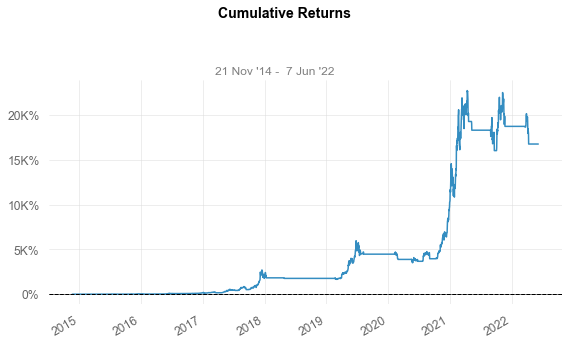

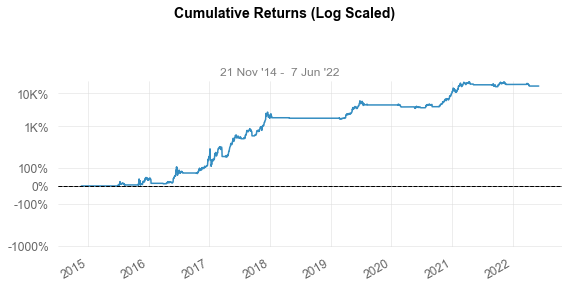

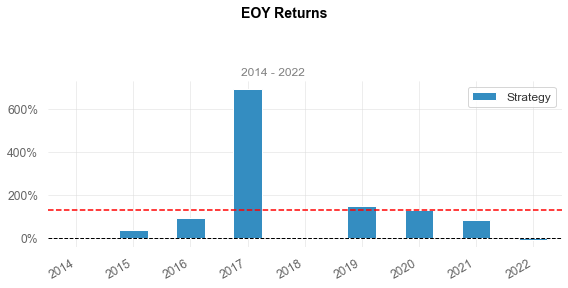

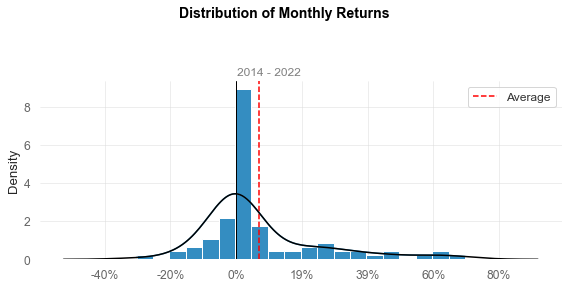

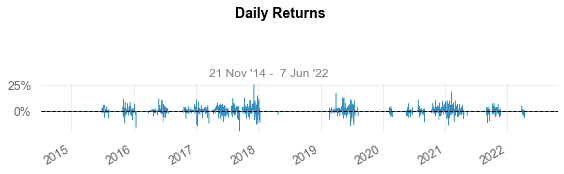

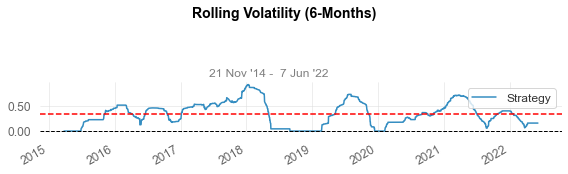

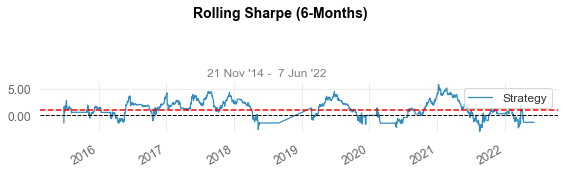

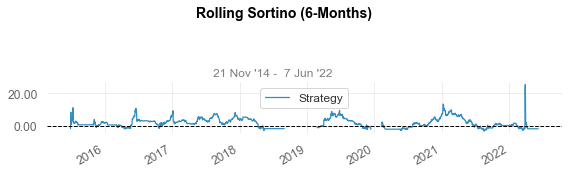

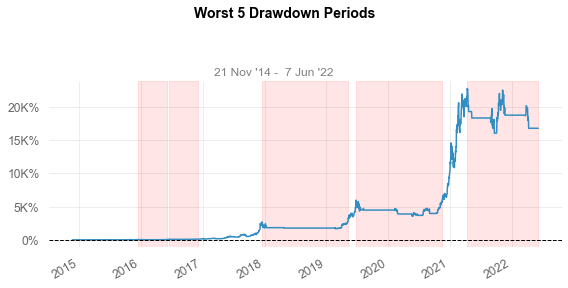

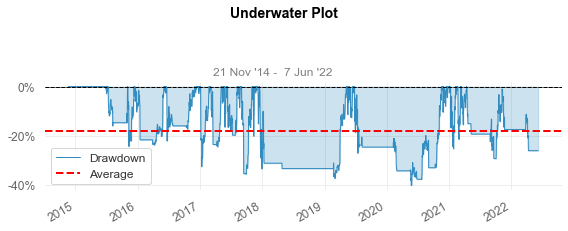

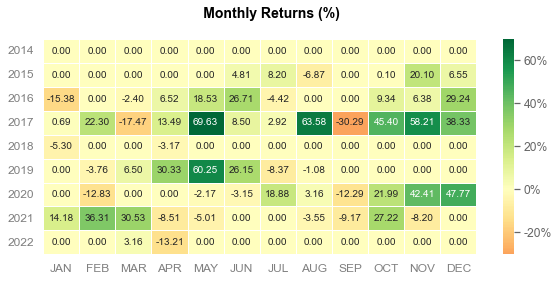

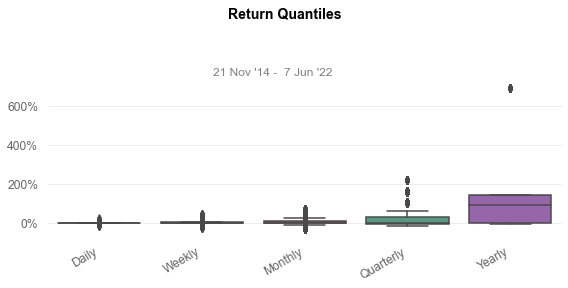

In [28]:
# View full perfomance metrics
qs.reports.full(strategy_returns)